In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda

In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('Diente.txt', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS
0,29/01/2019,01:00,291,312,3.33,9.4,11.9,90,926.7,0.0,0.0,10.4,54,27,15.7
1,29/01/2019,02:00,303,309,3.99,9.7,11.5,90,927.8,0.0,0.0,9.9,62,27,15.7
2,29/01/2019,03:00,295,307,3.78,10.4,11.2,99,929.3,0.0,0.0,9.6,68,27,15.7
3,29/01/2019,04:00,253,150,3.15,13.0,11.4,99,931.0,0.0,0.0,9.6,73,27,15.7
4,29/01/2019,05:00,293,314,2.82,11.2,11.2,88,932.5,0.0,0.0,8.8,77,27,15.7


In [4]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [5]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
RAPVIENTO2    float64
RAPRAFAGA2    float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RADSOL        float64
TEMPCOMB      float64
HUMCOMB         int64
HUMSUBS         int64
TEMPSUBS      float64
dtype: object

In [6]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
df.head()

,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS,FECHA
0,291,312,3.33,9.4,11.9,90,926.7,0.0,0.0,10.4,54,27,15.7,2019-01-29 01:00:00
1,303,309,3.99,9.7,11.5,90,927.8,0.0,0.0,9.9,62,27,15.7,2019-01-29 02:00:00
2,295,307,3.78,10.4,11.2,99,929.3,0.0,0.0,9.6,68,27,15.7,2019-01-29 03:00:00
3,253,150,3.15,13.0,11.4,99,931.0,0.0,0.0,9.6,73,27,15.7,2019-01-29 04:00:00
4,293,314,2.82,11.2,11.2,88,932.5,0.0,0.0,8.8,77,27,15.7,2019-01-29 05:00:00


In [8]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.0,80.000000,80.000000,80.000000,80.000000,80.000000
mean,205.187500,193.287500,3.632250,12.068750,9.717500,83.337500,932.468750,0.0,158.182500,12.205000,63.937500,25.675000,14.546250
std,93.466313,107.801293,2.198614,7.082383,4.570482,22.082093,2.689718,0.0,262.147096,9.195113,20.979401,0.882674,0.679155
min,23.000000,8.000000,0.540000,4.300000,2.300000,37.000000,926.700000,0.0,0.000000,2.100000,22.000000,24.000000,13.300000
25%,101.500000,83.000000,2.155000,6.500000,5.750000,62.500000,931.000000,0.0,0.000000,4.875000,46.000000,25.000000,14.000000
50%,250.000000,206.000000,2.925000,9.900000,9.700000,98.500000,932.200000,0.0,0.000000,9.600000,71.000000,26.000000,14.600000
75%,279.250000,307.000000,4.240000,16.600000,12.700000,100.000000,933.750000,0.0,217.450000,16.075000,81.250000,26.000000,15.100000
max,354.000000,351.000000,10.920000,40.000000,20.900000,100.000000,939.200000,0.0,767.300000,36.200000,91.000000,27.000000,15.700000


In [9]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS,FECHA


In [10]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS          205.18750
DIRR          193.28750
RAPVIENTO2      3.63225
RAPRAFAGA2     12.06875
TEMP            9.71750
HR             83.33750
PB            932.46875
PREC            0.00000
RADSOL        158.18250
TEMPCOMB       12.20500
HUMCOMB        63.93750
HUMSUBS        25.67500
TEMPSUBS       14.54625
dtype: float64

In [11]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

9.717499999999998

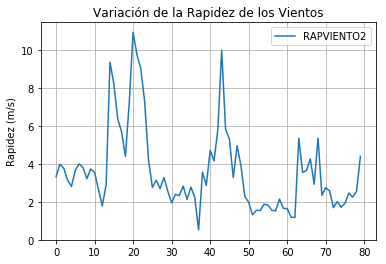

In [12]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.RAPVIENTO2.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

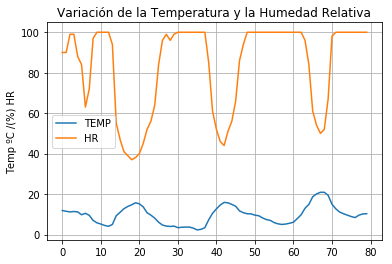

In [13]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

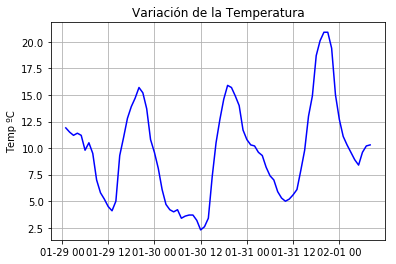

In [14]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

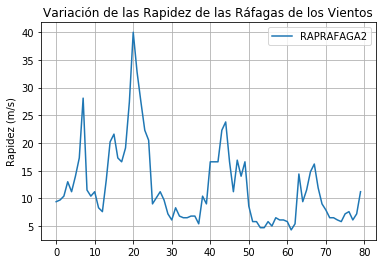

In [15]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.RAPRAFAGA2.plot(); plt.legend(loc='best')
plt.title("Variación de las Rapidez de las Ráfagas de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

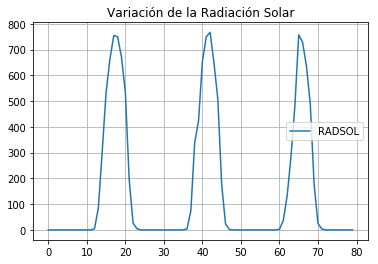

In [16]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.RADSOL.plot(); plt.legend(loc='best')
plt.title("Variación de la Radiación Solar")
plt.grid(True)
plt.show()